# Data 602 Final Project: Text Mining the Quran
#### Andy Carson

### Introduction

I am interested in learning more about what Islam teaches and what exactly is in the text of the Quran(/Koran/Qu'ran), especially because of its current political relevance both in the United States and abroad.  Consequently, to begin to do this, I will focus on text mining the text of the Quran.  I intend to scrape the entire text from available sources online, grouping the text by chapter and verse.  For each chapter, I will find the top words, keywords, and sentiment.  I will also find meaningful clusters of words (i.e., bigrams and trigrams). These analyses will be visualized, along with any trends or patterns I find.  Finally, I will summarize my conclusions.

I should note that my intentions in performing this analysis are purely descriptive with some inferences as to the meaning of my findings.  I make no judgments on the truth of what the Quran contains or the correctness of its teachings, and nothing below should be construed as such.  Also, as I am not a Quranic scholar, and as there are different traditions and methods of interpretation of the Quran, my conclusions below should be considered as an exploratory starting point in understanding the Quran, and not as representing any authoritative interpretation or conclusions.

### The Quran
Before beginning, a quick introduction to the nature and structure of the Quran may be helpful.  The Quran is the primary religious text used by Muslims, similar to the Bible (especially New Testament) for Christians and the Torah (the first five books of the Old Testament) for Jews.  It contains revelations and instructions from God (in Arabic, "Allah") given to Muhammad, the prophet of Islam, from between 610 AD through 632 AD when Muhammed died (reference: https://en.wikipedia.org/wiki/Islam).  The original and authoritative text is in Arabic, although there are translations into other languages as well (e.g., English).  However, these would not be considered authoritative, and, as is a danger in all translations, may not convey the full and intended meaning due to cultural, textual, and historical differences. The Quran contains 114 Chapters ("Surahs") and is organized roughly according to length, from the longest chapter to the shortest chapter.  However, the chronology of the chapters is also known, so one can also analyze chapters in their historical order, which I will do so below.

### Packages
The below modules include the packages I will be using for this project.  In particular, I will use:
* *Beautiful Soup* - text extraction
* *re* - regular expressions
* *numpy* - arrays
* *pandas* - data storage and transformation
* *matplotlib* - data visualization

In [1]:
##### imports
import urllib2
from bs4 import BeautifulSoup
import re
import time
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

### Get Text
The below code blocks get the text from the chosen website (http://www.clearquran.com).  The first three define functions that:
* get the website links
* get the website HTML
* get the text from the website HTML

**Note**: I chose the website above because it was one of the first returned in a search and because the structure of the website provided a relatively easy way to scrape and parse the data.  I make no claim that this translation is better or more authentic than other English translations.  Consequently, any conclusions I derive from the text depend on the accuracy of the textual translation itself.


In [2]:
def getLink(chapter):
    if chapter == 1:
        link = "http://www.clearquran.com/index.html"
    elif chapter < 10:
        link = "http://www.clearquran.com/00" + str(chapter) + ".html"
    elif chapter < 100:
        link = "http://www.clearquran.com/0" + str(chapter) + ".html"
    elif chapter < 115:
        link = "http://www.clearquran.com/" + str(chapter) + ".html"

    return link

In [3]:
def getWebsite(link):
    """
    Open a website, read the file, and return the HTML
    :param link: website URL
    :return: website HTML
    """
    #system pause - 2 seconds
    time.sleep(2)

    #read website
    headers = { 'User-Agent' : 'IE/11.0' }
    req = urllib2.Request(link, None, headers)
    website = urllib2.urlopen(req).read()

    return website

In [4]:
def getText(website):
    """
    Take a website's HTML and parse the text.
    Then find specific text within the website and return the text.

    :param website: HTML for a website
    :return: string of text
    """

    text = BeautifulSoup(website,'html.parser')

    list = []
    for i in text.find_all('div', class_=re.compile('show-text-class')):
        list.append(i.get_text())
    full_text = ''.join(list)

    return full_text



The fourth code block uses the three functions above to get the website link for each chapter ("Surah") of the Quran, get the HTML for the website, get the text for each website (i.e., the verses for the chapter), clean the text (e.g., remove punctuation, numbers), split the words, do additional clean up, and then assign the chapter number, verse number, and words to a dataframe.  The final result is a dataframe of Chapter, Verse, and Word for all of the words in the Quran.

The data is then saved to a CSV file for future use.

**Note:** I have commented out the below code block to avoid re-scraping the data over and over.  The following analysis uses the saved CSV file as it's data source.

In [5]:
# ### get data
# finalDf = pd.DataFrame(columns = ['Chapter','Verse','Word'])

# #for each chapter in the Quran (1-114)
# for i in np.arange(1,115): #115
#     word_list = []  
#     chapter = []
#     verse = []          

#     text = ''

#     #get link
#     link = getLink(i)

#     #get website HTML
#     website = getWebsite(link)

#     #get text from the website
#     text = getText(website)

#     #clean text
#     text = text.strip()
#     text = re.sub('\d','', text)
#     text = re.sub('[,.;"?!:`]','', text)

#     #remove unicode
#     text = text.encode('ascii', 'ignore')

#     #split into verses
#     verses = text.split("\n")

#     #for each verse, split the words, cleanup word list
#     verseCount = 0
#     for j in np.arange(0,len(verses)):
#         word = verses[j].strip()
#         word = word.split(" ")

#         if word != [u'']:
#             verseCount += 1
#         for k in np.arange(0,len(word)):
#             word_list.append(word[k])
#             chapter.append(i)
#             verse.append(verseCount)

#     tempDf = pd.concat([pd.DataFrame(chapter), pd.DataFrame(verse), pd.DataFrame(word_list)], axis=1)
#     tempDf.columns = ['Chapter','Verse','Word']
#     finalDf = finalDf.append(tempDf, ignore_index=True)

#     print i

# #save data
# fileName = "C:\Users\Andy\Desktop\Personal\Learning\CUNY\DATA602\FinalProject\quran_words.csv"
# finalDf.to_csv(fileName, sep=',', encoding='utf-8')

### Clean Up

Before analysis, we need to clean up the data.  I add column names to the dataframe and remove stopwords.  Before removal, there are 146,279 words.  After removal, there are 63,145 words.

In [6]:
##import data and clean up
finalDf = pd.read_csv("C:\Users\Andy\Desktop\Personal\Learning\CUNY\DATA602\FinalProject\quran_words.csv")
finalDf.columns =  ["WordNumber","Chapter","Verse", "Word"]
finalDf['WordUpper'] = finalDf['Word'].str.upper()

#stopwords
stopwordsDf = pd.concat([pd.DataFrame(stopwords.words('english')),pd.DataFrame(np.repeat(1,len(stopwords.words('english'))))], axis=1)
stopwordsDf.columns = ['WordUpper','StopWordFlag']
stopwordsDf['WordUpper'] = stopwordsDf['WordUpper'].str.upper()

#merge together
finalDf  = pd.merge(finalDf, stopwordsDf, how = 'left', on = 'WordUpper')
print "Total Words: " + str(len(finalDf))

#filter
finalDf_filtered = finalDf[finalDf['StopWordFlag']!=1]
print "Total Non-Stopword Words: " + str(len(finalDf_filtered))


Total Words: 146279
Total Non-Stopword Words: 63145


### Analysis
#### Word Counts

Now we can analyze the data.  First, we can see that, indeed, the chapters are roughly organized from longest to shortest by looking at word counts for each chapter.  There is a short introductory chapter, but this is followed by the longest chapter.  Apart from occasional dips downward and then back up, the overall trend is from longer chapters to shorter chapters.

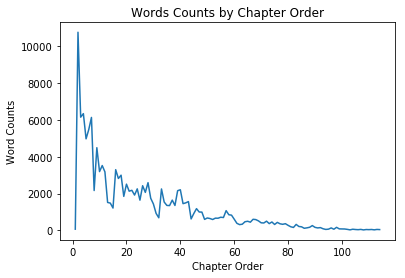

In [7]:
# get chapter word counts
chapterGrouped = finalDf.groupby('Chapter', as_index=False)
chapterCount = chapterGrouped.count()
dfchapterCount = pd.DataFrame(chapterCount)
dfchapterCount = dfchapterCount[['Chapter','Word']]
dfchapterCount.columns = ['Chapter','ChapterWordCounts']

#plot
plt.plot(dfchapterCount['Chapter'],dfchapterCount['ChapterWordCounts'])
plt.xlabel("Chapter Order")
plt.ylabel("Word Counts")
plt.title("Words Counts by Chapter Order")
plt.show()

How does this compare with the Chronological Ordering of the chapters?  Below, we first read in the chronological ordering from a website.  Then, we compare the Chapter order with the Chronological order using the number of verses.  As you can see, they are very different.

The chronological order begins dipping right at the beginning, but then climbs to an average maximum about 50 chapters in.  This decreases on average until the upper 80s when there are several very large spikes, including the longest chapter of the Quran, before continuing a downward trend.  There is a spike in long verses at the end as well. It is reasonable to conclude that these spikes relate to important periods in Muhammad's life when longer revelations would be necessary.  For example, it would make sense to have longer revelations prior to Muhammad's death to guide the people after he had died.  

The spike in the upper 80s appears to be related to the location of the revelation.  The spike occurs at chronological order 87 (marked by a green vertical line), and corresponds to the first revelation in Medina following Muhammad's leaving Mecca.  Such a lengthy revelation would be necessary to guide the community of believers in a new way of life in a new town, away from the persecution faced in Mecca.

In [8]:
#get chronological ordering of Quran chapters
link = "http://wikiislam.net/wiki/Chronological_Order_of_the_Qur%27an"
chron_df = pd.read_html(link, header = 0)
chron_df = pd.DataFrame(chron_df[0])
chron_df.columns = ['ChronologicalOrder','SurahName', 'Number of Verses', 'Location', 'Chapter']

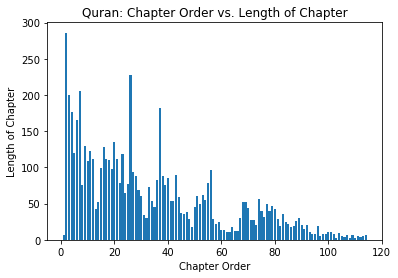

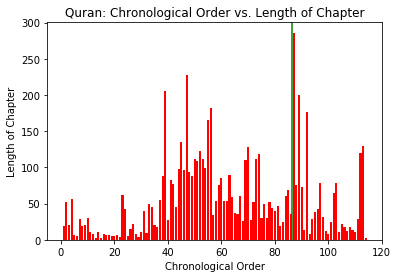

In [9]:
#show length vs. chapter ordering
plt.bar(chron_df['Chapter'],chron_df['Number of Verses'])
plt.xlabel("Chapter Order")
plt.ylabel("Length of Chapter")
plt.title("Quran: Chapter Order vs. Length of Chapter")
plt.show()

#show length vs. Chronological ordering
plt.bar(chron_df['ChronologicalOrder'],chron_df['Number of Verses'], color = 'r')
plt.axvline(86.5, color = 'g')
plt.xlabel("Chronological Order")
plt.ylabel("Length of Chapter")
plt.title("Quran: Chronological Order vs. Length of Chapter")
plt.show()

#### Term Frequncy
On to the actual text.  Which words occur the most?  When we look at term frequency over the whole of the Quran, we see that the word "God" ("Allah") occurs the most, over 2500 times.  "Lord" is second with just under 1000.  We also see "people", "believe", "earth", "merciful", "messenger", "punishment", "heavens", and "truth".

From this, we can infer that the Quran is foremost about God, whose most commonly ascribed attribute is mercy.  It is addressed to a people or people in general, calling them to believe in God's truth, which is conveyed via a messenger (i.e., Muhammad).  For those who believe, heaven awaits.  For those who do not, punishment.

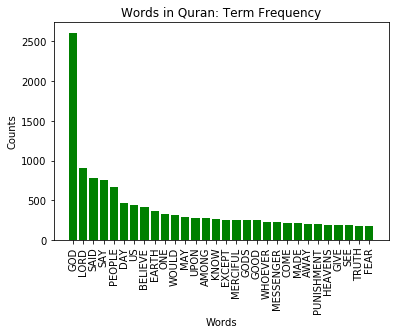

In [10]:
## term frequency
wordsGrouped = finalDf_filtered.groupby('WordUpper', as_index=False)
wordsCount = wordsGrouped.count().sort_values('Word', ascending=False)
dfwordsCount = pd.DataFrame(wordsCount)
dfwordsCount.reset_index(inplace = True)

#plot
plt.bar(np.arange(0,30),dfwordsCount["Word"][:30] , color = 'g')
plt.xticks(np.arange(0,30), dfwordsCount["WordUpper"][:30], rotation = 90)
plt.title('Words in Quran: Term Frequency')
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()

#### Normalized Term Frequency
Suppose we look at individual chapters.  To compare across chapters, we should normalize the word counts within a chapter by dividing a word's total counts in a chapter by the chapter's total word count.  The below plot shows the top 30 word-ratios, along with the associated word and chapter.  We can see that "God" appears quite a bit.  Other interesting words include "worship", "serve", "evil", "deny", "marvels", "condemned", and "shocker".

In [11]:
#join data with chronological ordering
finalDf_filtered  = pd.merge(finalDf_filtered, chron_df, how = 'left', on = 'Chapter')

In [12]:
#term frequency over whole Quran by chronological order
wordsChronGrouped = finalDf_filtered.groupby(['WordUpper', 'Chapter','ChronologicalOrder'], as_index=False)
wordsChronCount = wordsChronGrouped.count().sort_values('Word',ascending=False)
dfwordsChronCount = pd.DataFrame(wordsChronCount)
dfwordsChronCount = dfwordsChronCount[['WordUpper','Chapter','ChronologicalOrder','Word']]
dfwordsChronCount.columns = ['WordUpper','Chapter','ChronologicalOrder','WordCounts']

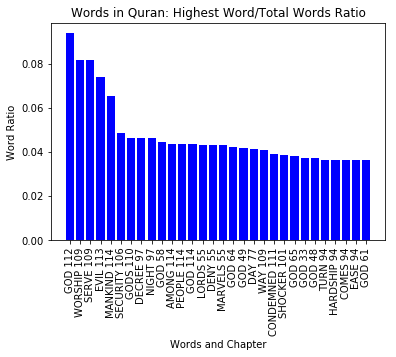

In [13]:
#adjust to divide frequency by number of words in chapter
dfwordsChronCount =  pd.merge(dfwordsChronCount, dfchapterCount, how = 'left', on = 'Chapter')
dfwordsChronCount['WordRatio'] = dfwordsChronCount['WordCounts'] / dfwordsChronCount['ChapterWordCounts'] 
dfwordsChronCount = dfwordsChronCount.sort_values('WordRatio',ascending=False)

#plot
plt.bar(np.arange(0,30),dfwordsChronCount['WordRatio'][:30] , color = 'b')
plt.xticks(np.arange(0,30), (dfwordsChronCount["WordUpper"][:30] + " " + dfwordsChronCount["Chapter"][:30].map(int).map(str)), rotation = 90)
plt.title('Words in Quran: Highest Word/Total Words Ratio')
plt.xlabel("Words and Chapter")
plt.ylabel("Word Ratio")
plt.show()

#### TFIDF
What we are really trying to get at are keywords.  A useful way of getting at keywords is to use TFIDF, that is Term Frequency (and) Inverse Document Frequency.  The Term Frequency, which we already have, is the number of times a word appears within a document.  Since some words occur quite a bit but are not particularly important in determining what a document is about (e.g., "said"), it is useful to prioritize unique words within the collection of documents as indicative of what each document contains.  This is done through the IDF.  However, since many rare words may not really be that important, one can combine TF andf IDF to score words according to how often they occur and their uniqueness.  Thus, one can pick out words that truly are key for any particular document.

In [14]:
##keywords: TFIDF

#TF
#already have

#IDF
idfList = []
for i in np.arange(0,len(dfwordsCount)):
    numberDocs = len(dfwordsChronCount[dfwordsChronCount['WordUpper'] == dfwordsCount['WordUpper'][i]])
    tempIDF = 1 + np.log(114.0 / int(numberDocs))
    idfList.append(tempIDF)

dfwordsCount['IDF'] = idfList

#TFIDF
df_tfidf = pd.merge(dfwordsChronCount, dfwordsCount[['WordUpper','IDF']], how = 'left', on = 'WordUpper')
df_tfidf['TFIDF'] = df_tfidf['WordCounts'] * df_tfidf['IDF']


However, when we look at the top words by Chapter and TFIDF, we do not have any new discoveries.  "God" is still the most important keyword.  We also see "marvels" again, along with "said" and "say".

In [15]:
print df_tfidf.sort_values('TFIDF',ascending=False)[['WordUpper', 'Chapter', 'TFIDF']][:15]

    WordUpper  Chapter       TFIDF
148       GOD      2.0  249.000000
48        GOD      4.0  212.000000
84        GOD      3.0  189.000000
44        GOD      9.0  156.000000
15    MARVELS     55.0  143.765171
92        GOD      5.0  137.000000
128      SAID     12.0  120.274019
971      SAID      2.0  117.023370
577      SAID      7.0  113.772721
784    JOSEPH     12.0  111.302068
448       SAY      6.0   99.788023
619    PEOPLE      7.0   93.973035
23        GOD     33.0   84.000000
368       GOD      6.0   83.000000
13      LORDS     55.0   81.999836


What if we normalize TFIDF?  That is, we use the normalized word counts for TF in the TFIDF equation.  Does this bring new insight?  Yes.  We see lots of new words in the top 15: "loser", "hates", "crusher", "plenty", "sacrifice", and "encourage".  It is important to note that many of these come from the same chapters, 108 and 109.  It would appear that these chapters have very strong keywords in them compared to the rest of the Quran's chapters.

In [16]:
#normalized TFIDF
df_tfidf['NormalizedWordCounts'] = df_tfidf['ChapterWordCounts'].mean() / df_tfidf['ChapterWordCounts'] * df_tfidf['WordCounts']
df_tfidf['NormalizedTFIDF'] = df_tfidf['NormalizedWordCounts'] * df_tfidf['IDF']
print df_tfidf.sort_values('NormalizedTFIDF', ascending=False)[['WordUpper', 'Chapter', 'NormalizedTFIDF']][:15]

    WordUpper  Chapter  NormalizedTFIDF
2       SERVE    109.0       736.307505
21    SHOCKER    101.0       627.502961
33      LOSER    108.0       582.681321
31      HATES    108.0       582.681321
15    MARVELS     55.0       570.294902
20  CONDEMNED    111.0       562.494348
70     BEGETS    112.0       509.846156
82    CRUSHER    104.0       502.002369
4     MANKIND    114.0       490.658890
37     PLENTY    108.0       471.084614
35  SACRIFICE    108.0       471.084614
1     WORSHIP    109.0       458.559404
5    SECURITY    106.0       451.093997
3        EVIL    113.0       436.671046
60  ENCOURAGE    103.0       425.495780


How often is a word the most important keyword in a chapter in the Quran?  We can find the maximum normalized TFIDF word for each chapter, and then by grouping on each distinct word, we can get a count for each keyword.  In the plot below, we see that "God" is the most important keyword in 32 of the 114 chapters.

There are 73 distinct words that the most important keyword in a chapter.  Most only occur once, in fact, only the top 5 shown below are the most important keyword in a chapter more than once.  The only word we haven't seen yet is "ease".

In [17]:
search = df_tfidf.groupby('Chapter', as_index=False)['NormalizedTFIDF'].max()
maxNormTFIDF = df_tfidf.loc[(df_tfidf['Chapter'] == search['Chapter'][0]) & (df_tfidf['NormalizedTFIDF'] == search['NormalizedTFIDF'][0])]

for i in np.arange(1, len(search)):
    temp = df_tfidf.loc[(df_tfidf['Chapter'] == search['Chapter'][i]) & (df_tfidf['NormalizedTFIDF'] == search['NormalizedTFIDF'][i])]
    maxNormTFIDF = maxNormTFIDF.append(temp, ignore_index = True)
maxDf =  maxNormTFIDF.groupby('WordUpper', as_index=False).count().sort_values('Chapter', ascending=False)

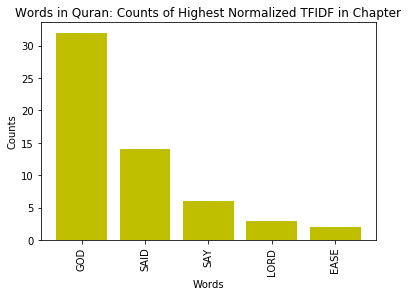

In [18]:
#plot
plt.bar(np.arange(0,5),maxDf['Chapter'][:5] , color = 'y')
plt.xticks(np.arange(0,5), (maxDf["WordUpper"][:5]), rotation = 90)
plt.title('Words in Quran: Counts of Highest Normalized TFIDF in Chapter')
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()


#### Bigrams
Let's move on from single words to bi-grams, that is, a pair of consecutive words.  From these we can get a better sense of the context or meaning of words, since we know what other words surround them.  In the below code, I find the bi-grams after having removed the stop words.  The top 30 most commonly occurring bi-grams are then plotted.

How might we interpret the bigrams below? Looking at the plot, we see the most common bi-gram is "heavens earth".  We have seen both words previously.  This may refer to "[the] heavens [and the] earth", which could be a way of expressing God's power and dominion over both "the heavens and the earth".  "Everything [in the] heavens" "belongs [to] God", who is the "Lord [of the] worlds".

We also see "God gracious", "gracious merciful", and "forgiving merciful", suggesting that God is gracious and merciful and forgiving.  Another aspect of God is that "God knows", perhaps referring to God's omniscience or knowledge of all things.

Finally, we see "day [of] resurrection", referring to end times and one's eternal status.  For those who "turn away" and do not "believe God" or worship gods "besides God" there is "painful punishment" awaiting.  Thus, one should "fear God" and "know God" and listen to "God['s] messenger" and the "good news".  Such news may be especially directed at the "children [of] Israel", that is, the Jewish people.

In [19]:
#bi-grams
bigrams = []
for i in np.arange(0,len(finalDf_filtered['WordUpper'])-1):
    if ~pd.isnull(finalDf_filtered['WordUpper'][i]):
        if ~pd.isnull(finalDf_filtered['WordUpper'][i+1]):
            bigrams.append(str(finalDf_filtered['WordUpper'][i]) + " " + str(finalDf_filtered['WordUpper'][i+1]))

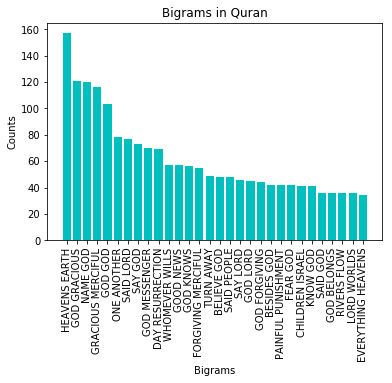

In [20]:
#create data frame
bigramsDf = pd.DataFrame(bigrams)
bigramsDf.columns = ['Bigram']
bigramsDf['Count'] = np.repeat(1,len(bigramsDf))
bigramsCounts = bigramsDf.groupby('Bigram', as_index = False).count().sort_values('Count', ascending=False)

#clean up
bigramsCounts = bigramsCounts[~bigramsCounts['Bigram'].str.contains('nan')]
bigramsCounts.reset_index(inplace = True)

#plot
plt.bar(np.arange(0,30),bigramsCounts['Count'][:30], color = 'c')
plt.xticks(np.arange(0,30), (bigramsCounts["Bigram"][:30]), rotation = 90)
plt.title('Bigrams in Quran')
plt.xlabel("Bigrams")
plt.ylabel("Counts")
plt.show()

#### Trigrams
Now let's look at trigrams, that is, consecutive groupings of three non-stopwords.  Using the same process as above, we can see similar groupings of words and infer a similar overall message.

For example, we see "God [is] gracious [and] merciful", "[in the] name [of] God [the] gracious", and "God [is] forgiving [and] merciful".  "God [is all] hearing [and all] knowing", "God [is] mighty [and] wise", and God "knows best".  We may infer that God "created [the] heavens [and] earth" and "everything [in the] heavens [and] earth " belongs to God.  We are called to "believe [and to do] good deeds" or "righteous deeds".  We must "fear God [and] obey", and as a "people [we should] worship God."  We will face "God [on the] last day" to be assigned a place of "abiding" "forever".  Those that the "Lord[']s marvels deny" should heed these warnings.

Something new and very interesting is "Jesus son [of] Mary".  This refers to Jesus, who instead of being considered divine as Christian's do, is one of the prophets of Islam but is not considered divine.

In [21]:
#tri-grams
trigrams = []
for i in np.arange(0,len(finalDf_filtered['WordUpper'])-2):
    if ~pd.isnull(finalDf_filtered['WordUpper'][i]):
        if ~pd.isnull(finalDf_filtered['WordUpper'][i+1]):
            if ~pd.isnull(finalDf_filtered['WordUpper'][i+2]):
                trigrams.append(str(finalDf_filtered['WordUpper'][i]) + " " + str(finalDf_filtered['WordUpper'][i+1])+ " " + str(finalDf_filtered['WordUpper'][i+2]))

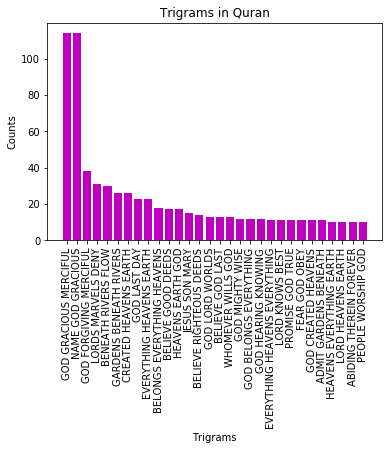

In [22]:
#create df
trigramsDf = pd.DataFrame(trigrams)
trigramsDf.columns = ['Trigram']
trigramsDf['Count'] = np.repeat(1,len(trigramsDf))
trigramsCounts = trigramsDf.groupby('Trigram', as_index = False).count().sort_values('Count', ascending=False)

#clean up
trigramsCounts = trigramsCounts[~trigramsCounts['Trigram'].str.contains('nan')]
trigramsCounts.reset_index(inplace = True)

#plot
plt.bar(np.arange(0,30),trigramsCounts['Count'][:30], color = 'm')
plt.xticks(np.arange(0,30), (trigramsCounts["Trigram"][:30]), rotation = 90)
plt.title('Trigrams in Quran')
plt.xlabel("Trigrams")
plt.ylabel("Counts")
plt.show()

#### Sentiment Analysis
A common textual analysis is to look at sentiment.  So we can ask, what is the sentiment over the course of the Quran?  We can look at this by actual chapter ordering, as well as chronologically.  I adapt from an approach located here: https://mran.microsoft.com/posts/twitter.html.  In essence, for each chapter, I do a count of the positive words and a count of the negative words, find the difference, and return that difference as the sentiment score.  While such an approach has obvious problems (e.g., "not funny" is counted as positive since "not" is ignored and "funny" is a positive word on its own), it is a useful starting point.

The list of positive and negative words I used can be found here: http://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar.

In [23]:
#positivewwords
positiveWords = open("C:\Users\Andy\Desktop\Personal\Learning\CUNY\DATA602\FinalProject\positive-words.txt")
positiveWordsList = positiveWords.readlines()
positiveWords.close()
positiveWordsList = pd.Series(positiveWordsList)
positiveWordsList = positiveWordsList.str.strip()
positiveWordsList = list(positiveWordsList)

#negativewwords
negativeWords = open("C:\Users\Andy\Desktop\Personal\Learning\CUNY\DATA602\FinalProject\\negative-words.txt")
negativeWordsList = negativeWords.readlines()
negativeWords.close()
negativeWordsList = pd.Series(negativeWordsList)
negativeWordsList = negativeWordsList.str.strip()
negativeWordsList = list(negativeWordsList)

In [24]:
chapter = []
sumPosList = []
sumNegList = []

#get sentiment for each chapter
for j in np.arange(1,115):
    text = finalDf_filtered[finalDf_filtered['Chapter']==j]['WordUpper']
    text = text.dropna()
    # print text.index

    tempPosList = []
    tempNegList = []

    for i in text.index:
        temp_pos = int(text[i].lower() in positiveWordsList)
        temp_neg = int(text[i].lower() in negativeWordsList)
        tempPosList.append(temp_pos)
        tempNegList.append(temp_neg)

    chapter.append(j)
    sumPosList.append(sum(tempPosList))
    sumNegList.append(sum(tempNegList))

In [25]:
#create df and join to chronological data
sentimentDf = pd.DataFrame({'Chapter': chapter, 'PositiveScore': sumPosList, 'NegativeScore': sumNegList})
sentimentDf['SentimentScore'] = sentimentDf['PositiveScore'] - sentimentDf['NegativeScore']
chronSentimentDf = pd.merge(chron_df,sentimentDf,how='left', on='Chapter')
chapSentimentDf =  chronSentimentDf.sort_values('Chapter')

Now we are ready for analysis.  First, what does the sentiment look like by traditional chapter order?  We can see that there are wide swings in sentiment, but these stabilize as time goes on.  Why?  After some exploration, we can see that, since the Quran is roughly ordered by chapter length, there are more opportunities for positive or negative words to occur, and this makes the longer chapters more likely to have higher or lower sentiment.

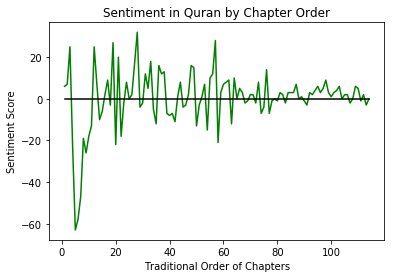

In [26]:
#plot
plt.plot(chapSentimentDf['Chapter'], chapSentimentDf['SentimentScore'], color = 'g')
plt.plot(chapSentimentDf['Chapter'], np.repeat(0,114), color = 'k')
plt.title('Sentiment in Quran by Chapter Order')
plt.xlabel("Traditional Order of Chapters")
plt.ylabel("Sentiment Score")
plt.show()

To adjust for this, we can normalize the sentiment by chapter length, that is, by calculating the average sentiment per verse in the chapter.  When we do so, the sentiment looks a lot more balanced.  There are some low points in the middle and some high points at the end, but overall, the sentiment appears to go back and forth.

In [27]:
chapSentimentDf['NormalizedSentimentScore'] = chapSentimentDf['SentimentScore'] / chapSentimentDf['Number of Verses']

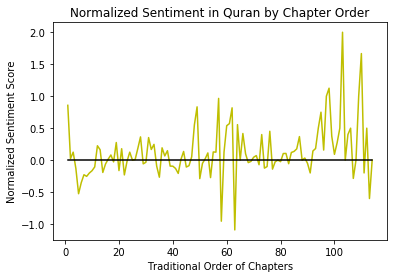

In [28]:
#plot
plt.plot(chapSentimentDf['Chapter'], chapSentimentDf['NormalizedSentimentScore'], color = 'y')
plt.plot(chapSentimentDf['Chapter'], np.repeat(0,114), color = 'k')
plt.title('Normalized Sentiment in Quran by Chapter Order')
plt.xlabel("Traditional Order of Chapters")
plt.ylabel("Normalized Sentiment Score")
plt.show()

We can do the same thing chronologically.  In the absence of normalization, it would appear that until about the 40th chronological chapter, the sentiment is fairly stable and mostly positive.  About chronological chapter 40, the sentiment swings back and forth wildly before settling out again.  This stability ceases right after the change from Mecca to Medina (the red vertical line) in which the sentiment swings to positive and negative extremes again.  The lowest sentiment in the whole Quran appears near the very end in chronological chapter 112 (traditional chapter 5).

When normalized, the first part of the Quran in chronological order has the strongest sentiment, and it is mostly positive.  The middle stabilizes and is almost flat until the transition from Mecca to Medina, when the strong sentiment re-emerges.  While it is mostly positive, the lowest normalized sentiments occur in chronological chapters 104 and 105 (traditional chapters 63 and 58).

In [29]:
chronSentimentDf['NormalizedSentimentScore'] = chronSentimentDf['SentimentScore'] / chronSentimentDf['Number of Verses']

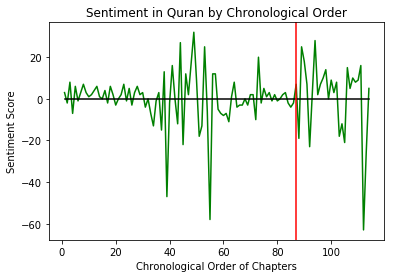

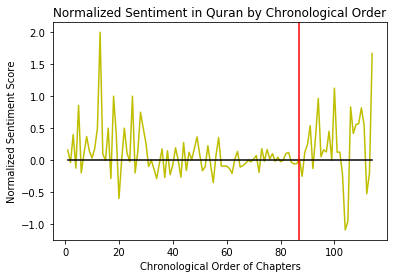

In [30]:
#plot
plt.plot(chronSentimentDf['ChronologicalOrder'], chronSentimentDf['SentimentScore'], color = 'g')
plt.plot(chronSentimentDf['ChronologicalOrder'], np.repeat(0,114), color = 'k')
plt.axvline(87, color = 'r')
plt.title('Sentiment in Quran by Chronological Order')
plt.xlabel("Chronological Order of Chapters")
plt.ylabel("Sentiment Score")
plt.show()

#plot normalized
plt.plot(chronSentimentDf['ChronologicalOrder'], chronSentimentDf['NormalizedSentimentScore'], color = 'y')
plt.plot(chronSentimentDf['ChronologicalOrder'], np.repeat(0,114), color = 'k')
plt.axvline(87, color = 'r')
plt.title('Normalized Sentiment in Quran by Chronological Order')
plt.xlabel("Chronological Order of Chapters")
plt.ylabel("Normalized Sentiment Score")
plt.show()

Which words are in the chapters that have the strongest sentiment, both positive and negative?  We can see which chapters have the highest and lowest sentiment and normalized sentiment in the tables below.

On the positive side, traditional chapter 28 is a longer chapter and has words like "given", "land", "guidance", "know", and "resurrection".  Traditional chapter 103 is very short and has the words "good", "gracious", "merciful", "patience".  Traditional chapter 110 is also short, and has words like "praise", "merciful", "celebrate", and "victory".

On the negative side, traditional chapter 5 is a longer chapter and has words like "fear", "disbelieve", "punishment", "hostile", and "hunger".  Traditional chapter 58 has words like "punishment", "Satan", "oppose", "estrange", and "lie".  Traditional chapter 63 has words like "hypocrites", "repel", "deluded", and "evil".

Obviously, to really understand what these chapters are about and why they have very positive or very negative sentiment, one must read them to understand the context of the positive/negative words that determine the sentiment.

In [31]:
print "Lowest Sentiment Score"
print chronSentimentDf.sort_values('SentimentScore')[['Chapter','ChronologicalOrder','SentimentScore']][:3]

print "\nHighest Sentiment Score"
print chronSentimentDf.sort_values('SentimentScore', ascending=False)[['Chapter','ChronologicalOrder','SentimentScore']][:3]

print "\nLowest Normalized Sentiment Score"
print chronSentimentDf.sort_values('NormalizedSentimentScore')[['Chapter','ChronologicalOrder','NormalizedSentimentScore']][:3]

print "\nHighest Normalized Sentiment Score"
print chronSentimentDf.sort_values('NormalizedSentimentScore', ascending=False)[['Chapter','ChronologicalOrder','NormalizedSentimentScore']][:3]

Lowest Sentiment Score
     Chapter  ChronologicalOrder  SentimentScore
111        5                 112             -63
54         6                  55             -58
38         7                  39             -47

Highest Sentiment Score
    Chapter  ChronologicalOrder  SentimentScore
48       28                  49              32
93       57                  94              28
43       19                  44              27

Lowest Normalized Sentiment Score
     Chapter  ChronologicalOrder  NormalizedSentimentScore
103       63                 104                 -1.090909
104       58                 105                 -0.954545
19       113                  20                 -0.600000

Highest Normalized Sentiment Score
     Chapter  ChronologicalOrder  NormalizedSentimentScore
12       103                  13                  2.000000
113      110                 114                  1.666667
99        98                 100                  1.125000


### Conclusion
So what is the Quran really about?  While the above analysis can't provide any nuanced or really specific conclusions, we can say that the Quran (and Islam) is generally about:
* God, who is gracious, merciful, forgiving, powerful, knowledgeable, and creator of the heavens and the earth
* God's instructions on how to live one's life in proper obedience and worship to God
* The eternal reward or punishment due to humans depending on how they live their lives in obedience or disobedience to God

In this, we can say that the Quran (and Islam) is in very general agreement with the other Abrahamic faiths of Judaism and Christianity in these general teachings of the religion.  That is, at a very general level, these three faiths appear to be in agreement on the general nature of God and the purpose and destiny of humanity.  However, a more detailed comparison of these religions would likely reveal great and important differences.  For example, on the question of "who is Jesus?", each gives a very different and important answer.  

While such differences should not be minimized or ignored, nor should they detract from the commonalities and agreement that these faiths have with each other.  Hopefully, a greater understanding of these similarities and differences can lead to common cause and coordination in confronting the challenges the world faces today.  My hope is that the above analysis has provided at least a small and initial step forward in that greater understanding, not just for me, but for you as well.